# Loan Defaulter Analysis

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import itertools

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample


import yellowbrick as yb
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load data into dataframe

In [2]:
# Data loading into dataframe
df = pd.read_csv('application_data.csv')

# Check the dimension of the table

In [3]:
# .shape gives us rows and columns in the form of tuple which we can seperate it by indexing
print('The dimension of the table is: ', df.shape)
print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dimension of the table is:  (307511, 122)
This dataset has 307511 rows and 122 columns.


# Look at the data

In [4]:
# Displaying top 5 rows of data
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Questions that might help us predict who will be loan defaulter and who won't:

## Before answering any questions we need to eliminate columns that are not required for the project

### Checking columns name

In [5]:
df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [6]:
# Checking each column null values out of 100
100*df.isnull().sum()/len(df)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [7]:
# Droping columns from our dataframe if columns has more than 50 percent of missing values
df.drop(df.columns[(100*df.isnull().sum()/len(df))>=50], axis=1, inplace= True)
# Checking for columns again
df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG',

In [8]:
# Dropping unwanted columns from our dataframe
df = df.drop(['SK_ID_CURR','EXT_SOURCE_2', 'EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)

In [9]:
# Checking columns left
df.columns.values

array(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE'], dtype=object)

In [10]:
# Checking dimension of the table again for the updated data
print('The dimension of the table is: ', df.shape)
print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dimension of the table is:  (307511, 37)
This dataset has 307511 rows and 37 columns.


In [11]:
# Checking missing values from most to least
df.isnull().sum().sort_values(ascending = False)

OCCUPATION_TYPE                96391
NAME_TYPE_SUITE                 1292
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT_W_CITY        0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
REGION_RATING_CLIENT               0
TARGET                             0
FLAG_MOBIL                         0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
FLAG_EMP_PHONE                     0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
NAME_CONTRACT_TYPE                 0
DAYS_EMPLOYED                      0
DAYS_BIRTH                         0
REGION_POPULATION_RELATIVE         0
NAME_HOUSING_TYPE                  0
N

In [12]:
# List of columns with missing values
print(df.columns[100*df.isnull().sum()/len(df) > 0].tolist())

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']


### What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?

In [13]:
# Data type 
df.dtypes.sort_values(ascending = False)

ORGANIZATION_TYPE               object
NAME_FAMILY_STATUS              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
OCCUPATION_TYPE                 object
NAME_CONTRACT_TYPE              object
NAME_HOUSING_TYPE               object
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
CNT_FAM_MEMBERS                float64
REGION_POPULATION_RELATIVE     float64
DAYS_REGISTRATION              float64
AMT_GOODS_PRICE                float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_INCOME_TOTAL               float64
CNT_CHILDREN                     int64
LIVE_CITY_NOT_WORK_CITY          int64
REG_CITY_NOT_WORK_CITY           int64
REG_CITY_NOT_LIVE_CITY           int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_REGION_NOT_WORK_REGION       int64
REG_REGION_NOT_LIVE_REGION       int64
REGION_RATING_CLIENT_W_CI

In [14]:
# Since DAYS_REGISTRATION and CNT_FAM_MEMBERS column cannot be float we will change it into integer
df['DAYS_REGISTRATION']= df['DAYS_REGISTRATION'].astype('int64')

# We will drop missing values from CNT_FAM_MEMBERS since it has only 2 missing values and will be
# us an error while converting datatype.  
df.dropna(subset=['CNT_FAM_MEMBERS'], inplace= True)
df['CNT_FAM_MEMBERS']= df['CNT_FAM_MEMBERS'].astype('int64')

# Dropping missing values from AMT_ANNUITY AND AMT_GOODS_PRICE
df.dropna(subset=['AMT_ANNUITY'], inplace= True)
df['AMT_ANNUITY']= df['AMT_ANNUITY'].astype('int64')

df.dropna(subset=['AMT_GOODS_PRICE'], inplace= True)
df['AMT_GOODS_PRICE']= df['AMT_GOODS_PRICE'].astype('int64')

In [15]:
# Converting negative value to positive in columns
neg_cols = ['DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_EMPLOYED','DAYS_BIRTH']
# Interating through negative columns list and applying lambda x (abs for making it positive)
for i in neg_cols:
    df[i] = df[i].apply(lambda x: round(abs(x)))

In [16]:
# Count distinct observations
df.nunique().sort_values()

TARGET                             2
REG_REGION_NOT_LIVE_REGION         2
FLAG_MOBIL                         2
FLAG_EMAIL                         2
FLAG_EMP_PHONE                     2
FLAG_WORK_PHONE                    2
FLAG_CONT_MOBILE                   2
LIVE_REGION_NOT_WORK_REGION        2
REG_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY             2
FLAG_PHONE                         2
FLAG_OWN_REALTY                    2
FLAG_OWN_CAR                       2
NAME_CONTRACT_TYPE                 2
REG_CITY_NOT_LIVE_CITY             2
LIVE_CITY_NOT_WORK_CITY            2
REGION_RATING_CLIENT               3
CODE_GENDER                        3
REGION_RATING_CLIENT_W_CITY        3
NAME_FAMILY_STATUS                 5
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   8
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   18
O

### ORGANIZATION_TYPE, OCCUPATION_TYPE and columns less than or equal to 8 are categorical columns; and others are numerical columns

### Are the numerical variables correlated?

In [17]:
# In order to see the numerical correlation we can see from above data type that there are int64 and float64 types.
# We will seperate numerical data and use correlation function and then split target from independent variables. 
num_df = df.select_dtypes(include=['float64', 'int64'])
X = num_df.drop('TARGET', axis=1)
y = num_df['TARGET']

In [18]:
# Seperate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
X_train.shape, X_test.shape

((215054, 25), (92167, 25))

In [20]:
# Correlation
X_train.corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,0.011982,0.003810,0.022256,-0.000227,-0.027392,-0.331869,-0.241852,-0.183840,0.028213,...,0.021520,0.879442,0.025920,0.025425,-0.012587,0.008345,0.015093,0.020000,0.071308,0.071224
AMT_INCOME_TOTAL,0.011982,1.000000,0.134777,0.165344,0.137127,0.064005,-0.023692,-0.055125,-0.024093,-0.007119,...,0.033145,0.014814,-0.073629,-0.079079,0.026411,0.053642,0.049884,0.002687,0.004864,0.006791
AMT_CREDIT,0.003810,0.134777,1.000000,0.770781,0.986882,0.100161,0.054034,-0.064176,-0.011638,0.007649,...,0.018021,0.064100,-0.101495,-0.110580,0.022518,0.050024,0.050229,-0.026919,-0.018377,0.001027
AMT_ANNUITY,0.022256,0.165344,0.770781,1.000000,0.775781,0.119511,-0.010533,-0.102777,-0.040574,-0.011540,...,0.074083,0.076520,-0.127975,-0.140764,0.038628,0.077997,0.073944,-0.006586,0.002422,0.012114
AMT_GOODS_PRICE,-0.000227,0.137127,0.986882,0.775781,1.000000,0.103960,0.052569,-0.061741,-0.013431,0.010876,...,0.018427,0.062045,-0.103491,-0.111905,0.024472,0.051022,0.050378,-0.027189,-0.020052,-0.000624
REGION_POPULATION_RELATIVE,-0.027392,0.064005,0.100161,0.119511,0.103960,1.000000,0.029521,-0.004204,0.053272,0.006552,...,0.041733,-0.026246,-0.531192,-0.529892,0.002189,0.056579,0.078730,-0.050632,-0.044203,-0.016270
DAYS_BIRTH,-0.331869,-0.023692,0.054034,-0.010533,0.052569,0.029521,1.000000,0.624344,0.332610,0.272573,...,-0.086815,-0.280360,-0.008361,-0.007776,-0.065882,-0.096327,-0.070640,-0.180504,-0.242183,-0.158999
DAYS_EMPLOYED,-0.241852,-0.055125,-0.064176,-0.102777,-0.061741,-0.004204,0.624344,1.000000,0.215792,0.274046,...,-0.061768,-0.235156,0.033341,0.035273,-0.037817,-0.110020,-0.097985,-0.093528,-0.258410,-0.220408
DAYS_REGISTRATION,-0.183840,-0.024093,-0.011638,-0.040574,-0.013431,0.053272,0.332610,0.215792,1.000000,0.103440,...,-0.033346,-0.173884,-0.077885,-0.072181,-0.027299,-0.035141,-0.027201,-0.064519,-0.099941,-0.072981
DAYS_ID_PUBLISH,0.028213,-0.007119,0.007649,-0.011540,0.010876,0.006552,0.272573,0.274046,0.103440,1.000000,...,-0.027187,0.021306,0.005281,0.007791,-0.034279,-0.048403,-0.034974,-0.076819,-0.100616,-0.062309


In [21]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [22]:
# Threshold of 0.8, checking length of highly correlated variables
corr_feature = correlation(X_train, 0.8)
len(set(corr_feature))

6

Text(0.5, 1.0, 'Correlation Matrix')

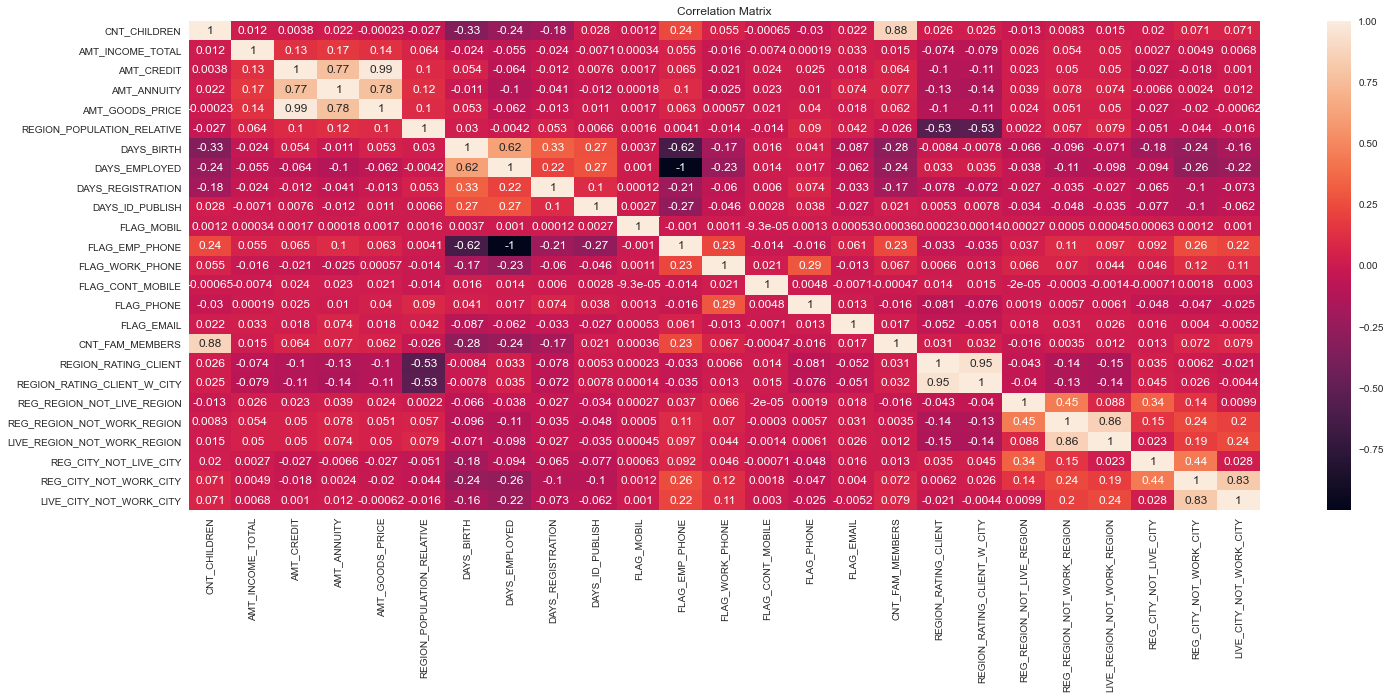

In [23]:
#set up the figure size
plt.figure(figsize=(24, 9))
# heatmap using seaborn
sns.heatmap(X_train.corr(), annot=True, annot_kws={"size": 12})
plt.title('Correlation Matrix')

In [24]:
# Highly correlated features that we want to drop from our dataframe
corr_feature

{'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'FLAG_EMP_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'REGION_RATING_CLIENT_W_CITY'}

In [25]:
# Removing highly correlated variable 
X_train.drop(corr_feature, axis=1)
X_test.drop(corr_feature, axis=1)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY
136425,0,112500.0,879480.0,25843,0.035792,19185,9017,3017,2707,1,0,1,0,0,2,0,0,0,0
124893,0,180000.0,622413.0,26500,0.005002,16036,3525,6940,4662,1,0,1,1,1,3,0,0,0,0
283819,0,202500.0,760225.5,53041,0.046220,19416,659,9457,2124,1,0,1,0,0,1,0,0,0,1
125546,1,135000.0,616756.5,31621,0.011657,13274,117,467,1428,1,0,1,0,1,1,1,1,0,0
95170,0,135000.0,1319269.5,38574,0.020246,21405,365243,3704,3704,1,0,1,1,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229928,0,225000.0,545040.0,36553,0.007020,11784,1347,405,1563,1,0,1,0,0,2,0,0,0,0
33056,0,81000.0,495000.0,21100,0.009334,20400,1029,12052,2823,1,0,1,0,0,2,0,0,0,0
161989,1,135000.0,807984.0,26833,0.010643,10653,498,10142,283,1,0,1,0,0,2,0,0,0,1
110642,0,157500.0,900000.0,41836,0.026392,16008,272,8596,4262,1,0,1,1,0,2,0,0,0,1


### Distribution of application based on Categorization

0    Unaccompanied
dtype: object


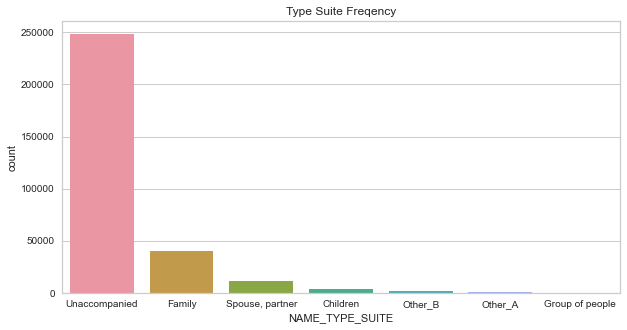

In [26]:
# NAME_TYPE_SUITE column imputation
plt.figure(figsize=(10,5))
sns.countplot(x='NAME_TYPE_SUITE',data=df, order = df['NAME_TYPE_SUITE'].value_counts().index)
plt.title('Type Suite Freqency')
print(df.NAME_TYPE_SUITE.mode())

0    Laborers
dtype: object


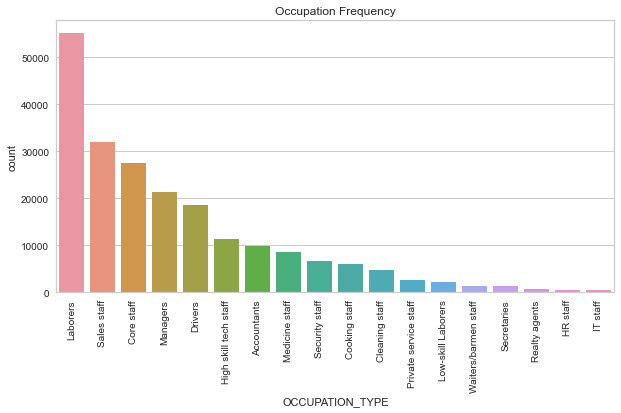

In [27]:
# OCCUPATION_TYPE column imputation
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x='OCCUPATION_TYPE',data=df, order = df['OCCUPATION_TYPE'].value_counts().index)
plt.title('Occupation Frequency')
print(df.OCCUPATION_TYPE.mode())

0    Unaccompanied
dtype: object


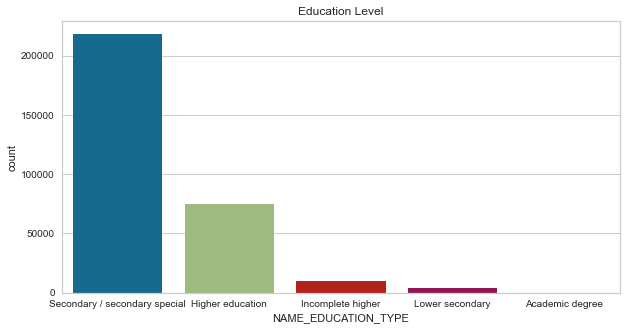

In [28]:
# NAME_EDUCATION_TYPE column imputation
plt.figure(figsize=(10,5))
sns.countplot(x='NAME_EDUCATION_TYPE',data=df, order = df['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('Education Level')
print(df.NAME_TYPE_SUITE.mode())

0    Unaccompanied
dtype: object


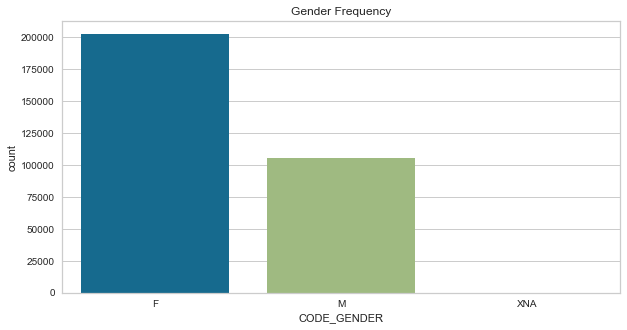

In [29]:
# CODE_GENDER column imputation
plt.figure(figsize=(10,5))
sns.countplot(x='CODE_GENDER',data=df, order = df['CODE_GENDER'].value_counts().index)
plt.title('Gender Frequency')
print(df.NAME_TYPE_SUITE.mode())

### AGE is given in DAYS_BIRTH (in Days), it will be better if we change it to categorical

In [30]:
# Assigning DAYS_BIRTH column to self after dividing by 365 to get year.
df['DAYS_BIRTH']= df['DAYS_BIRTH']/365
# With the help of pandas .cut we will get Categorical AGE column
df['AGE']= pd.cut(df['DAYS_BIRTH'],[0,27,55,70],labels = ['Young','Adult','Elderly'])
# Checking how our Age column looks like
df.AGE

0           Young
1           Adult
2           Adult
3           Adult
4           Adult
           ...   
307506      Young
307507    Elderly
307508      Adult
307509      Adult
307510      Adult
Name: AGE, Length: 307221, dtype: category
Categories (3, object): ['Young' < 'Adult' < 'Elderly']

### Are the distributions of numerical variables the same or different among loan payer or defaulter? Is the loan paid rate different for different values? For example, were people more likely to pay loan if they were younger? 

,AGE,TARGET,percent
0,Young,0,88.537170
1,Young,1,11.462830
2,Adult,0,91.348345
3,Adult,1,8.651655
4,Elderly,0,94.787889
5,Elderly,1,5.212111


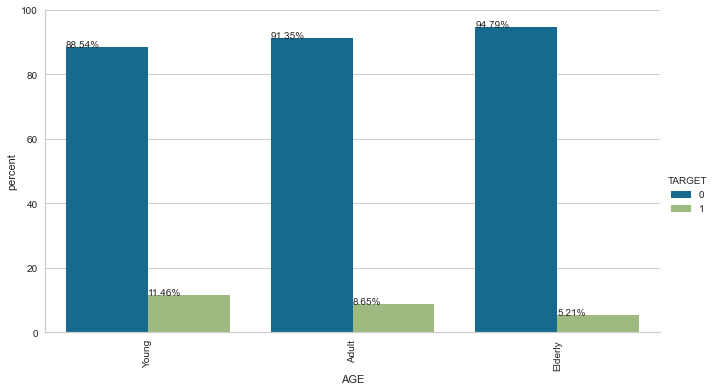

In [31]:
# Assigning variables 
x,y = 'AGE', 'TARGET'
# Group by AGE for TARGET column and normalization is set to True
df1 = df.groupby(x)[y].value_counts(normalize=True)
# It returns multiplication of 100
df1 = df1.mul(100)
# Removing column name to percent
df1 = df1.rename('percent').reset_index()
# plotting bar graph from seaborn, aspect ratio of each facet
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=15/8.27)
# Used to set the y-axis view limits
g.ax.set_ylim(0,100)
# Rotating x ticks vertically
plt.xticks(rotation=90)
# Iterating through g.ax.patches and labeling percentage on top of bar graph
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
df1

### From the chart above we can see that 11.46% of young people fail to pay their loans on time. 

### Are there different payment rates in different categories? For example, did more women paid loan than man?

,CODE_GENDER,TARGET,percent
0,F,0,93.002754
1,F,1,6.997246
2,M,0,89.851952
3,M,1,10.148048
4,XNA,0,100.000000


posx and posy should be finite values
posx and posy should be finite values


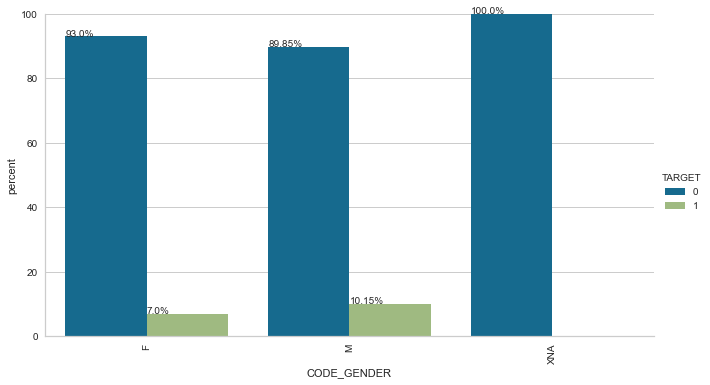

In [32]:
# Assigning variables 
x,y = 'CODE_GENDER', 'TARGET'
# Group by AGE for TARGET column and normalization is set to True
df1 = df.groupby(x)[y].value_counts(normalize=True)
# It returns multiplication of 100
df1 = df1.mul(100)
# Removing column name to percent
df1 = df1.rename('percent').reset_index()
# plotting bar graph from seaborn, aspect ratio of each facet
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=15/8.27)
# Used to set the y-axis view limits
g.ax.set_ylim(0,100)
# Rotating x ticks vertically
plt.xticks(rotation=90)
# Iterating through g.ax.patches and labeling percentage on top of bar graph
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
df1

### Chances of making loan payment on time is higher than Male for Female. People who did not specified their gender are tend to make payment 100%.

# Look at summary information about data (total, mean, min, max, freq, unique, etc.) Does this present any more questions? Does it lead to a conclusion yet?

In [33]:
# Type of variables in the table
# Describing a DataFrame. By default only numeric fields are returned.
print('Describe Data')
print(df.describe())

Describe Data
              TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307221.000000  307221.000000      3.072210e+05  3.072210e+05   
mean        0.080737       0.416977      1.688326e+05  5.993163e+05   
std         0.272431       0.722047      2.372199e+05  4.025196e+05   
min         0.000000       0.000000      2.565000e+04  4.500000e+04   
25%         0.000000       0.000000      1.125000e+05  2.700000e+05   
50%         0.000000       0.000000      1.485000e+05  5.146020e+05   
75%         0.000000       1.000000      2.025000e+05  8.086500e+05   
max         1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307221.000000     3.072210e+05               307221.000000   
mean    27120.225984     5.383973e+05                    0.020870   
std     14492.090836     3.694484e+05                    0.013832   
min      1615.000000     4.050000e+04                    0.000290   
2

In [34]:
# Including only string columns in a DataFrame description.
print('Summarized Data')
print(df.describe(include=['O']))

Summarized Data
       NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307221      307221       307221          307221   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278220      202251       202637          213086   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306207           307221                         307221   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248515           158583                         218186   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307221             307221          210887   
unique                  5                  6              18   
top               Married  House / apartment        Laborers   
freq  

# Make some bar charts for variables with only a few options.

Text(0, 0.5, 'Counts')

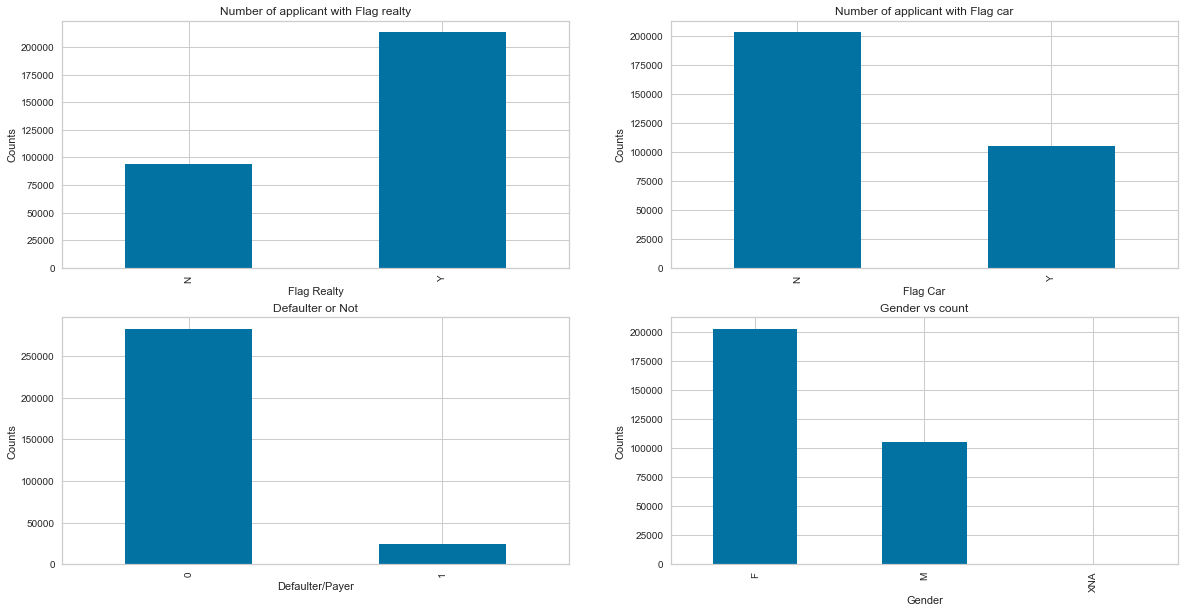

In [35]:
# setting up the figure size
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2 , 2, figsize=(20,10))

# Creating bar chart and labeling x and y axis
df['FLAG_OWN_REALTY'].value_counts().sort_index().plot(kind='bar', ax=axis1)
axis1.title.set_text('Number of applicant with Flag realty')
axis1.set_xlabel('Flag Realty')
axis1.set_ylabel('Counts')

df['FLAG_OWN_CAR'].value_counts().sort_index().plot(kind='bar', ax=axis2)
axis2.title.set_text('Number of applicant with Flag car')
axis2.set_xlabel('Flag Car')
axis2.set_ylabel('Counts')

df['TARGET'].value_counts().sort_index().plot(kind='bar', ax=axis3)
axis3.title.set_text('Defaulter or Not')
axis3.set_xlabel('Defaulter/Payer')
axis3.set_ylabel('Counts')

df['CODE_GENDER'].value_counts().sort_index().plot(kind='bar', ax=axis4)
axis4.title.set_text('Gender vs count')
axis4.set_xlabel('Gender')
axis4.set_ylabel('Counts')

### Distribution of contract type ,gender ,own car ,own house with respect to Repayment status(Target variable)

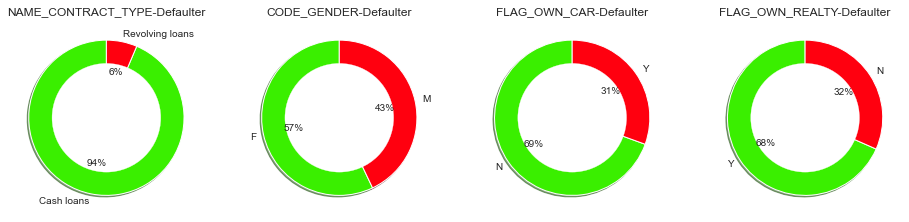

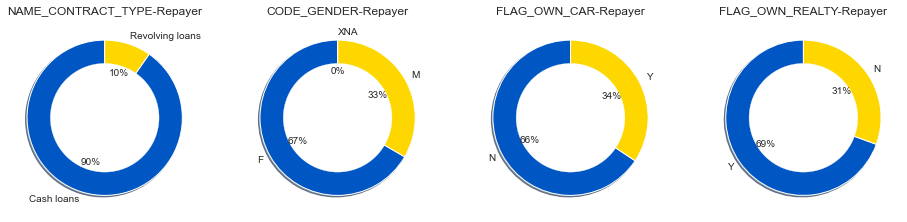

In [36]:
default = df[df["TARGET"]==1][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
non_default = df[df["TARGET"]==0][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Repayer")

#### In first column we can see that percentage of cash loans is 4% more in defaults than revovling loans. 
#### In second column we can see that percentage of males is 10% more in defaults than repayers. 

## Top 10 Correlation Fields for Repayer

In [37]:
df_repayer = df[df['TARGET'] == 0]
df_defaulter = df[df['TARGET'] == 1]

In [38]:
corrmat = df_repayer.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
320,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
133,AMT_GOODS_PRICE,AMT_CREDIT,0.99
512,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
443,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
593,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86
674,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83
134,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
107,AMT_ANNUITY,AMT_CREDIT,0.77
215,DAYS_EMPLOYED,DAYS_BIRTH,0.63
319,FLAG_EMP_PHONE,DAYS_BIRTH,0.62


## Top 10 Correlation Fields for Defaulter

In [39]:
corrmat = df_defaulter.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
320,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
133,AMT_GOODS_PRICE,AMT_CREDIT,0.98
512,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
443,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
593,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.85
674,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.78
107,AMT_ANNUITY,AMT_CREDIT,0.75
134,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
215,DAYS_EMPLOYED,DAYS_BIRTH,0.58
319,FLAG_EMP_PHONE,DAYS_BIRTH,0.58


# To see if the data is correlated, make some Pearson Ranking charts

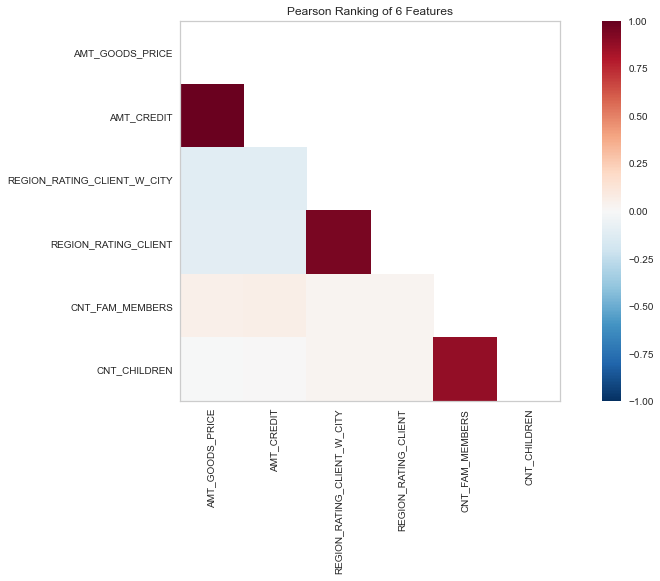

In [40]:
#set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# creating list
num_features = ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
                'CNT_FAM_MEMBERS', 'CNT_CHILDREN']

# extract the numpy arrays from the data frame
X = df[num_features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="appdata1.png") # Draw/show/poof the data
plt.show()

### Above Pearson Ranking shows strong relation between ('AMT_GOODS_PRICE', 'AMT_CREDIT'), 
### ('REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT'), ('CNT_FAM_MEMBERS', 'CNT_CHILDREN')

# Use Parallel Coordinates visualization to compare the distributions of numerical variables between applicants who paid loan on time and defaulter.
### Applicants with children at certain region have higher chance of being defaulter with his/her income and the credit amount. 

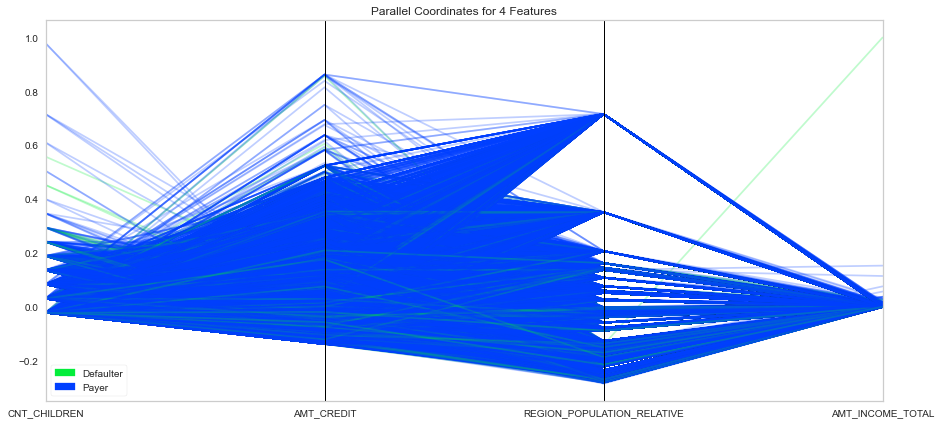

In [41]:
# Compare variables against Payer and Defaulter
#set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Payer', 'Defaulter']
num_features = ['CNT_CHILDREN', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL']

# copy data to a new dataframe
data_norm = df.copy()

# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (df[feature] - df[feature].mean(skipna=True)) / (df[feature].max(skipna=True) - df[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = df.TARGET.values


# Instantiate the visualizer, it takes classes and features that we created above
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof(outpath="pcoords2.png") # Draw/show/poof the data
plt.show()


# Use Stack Bar Charts to compare applicants who paid loan on time and who didn’t based on the other variables.
### a. More females paid on time than men.  Lower education level had hard time to pay back their loans. Cash loan type is paid more than revolving loan type. 

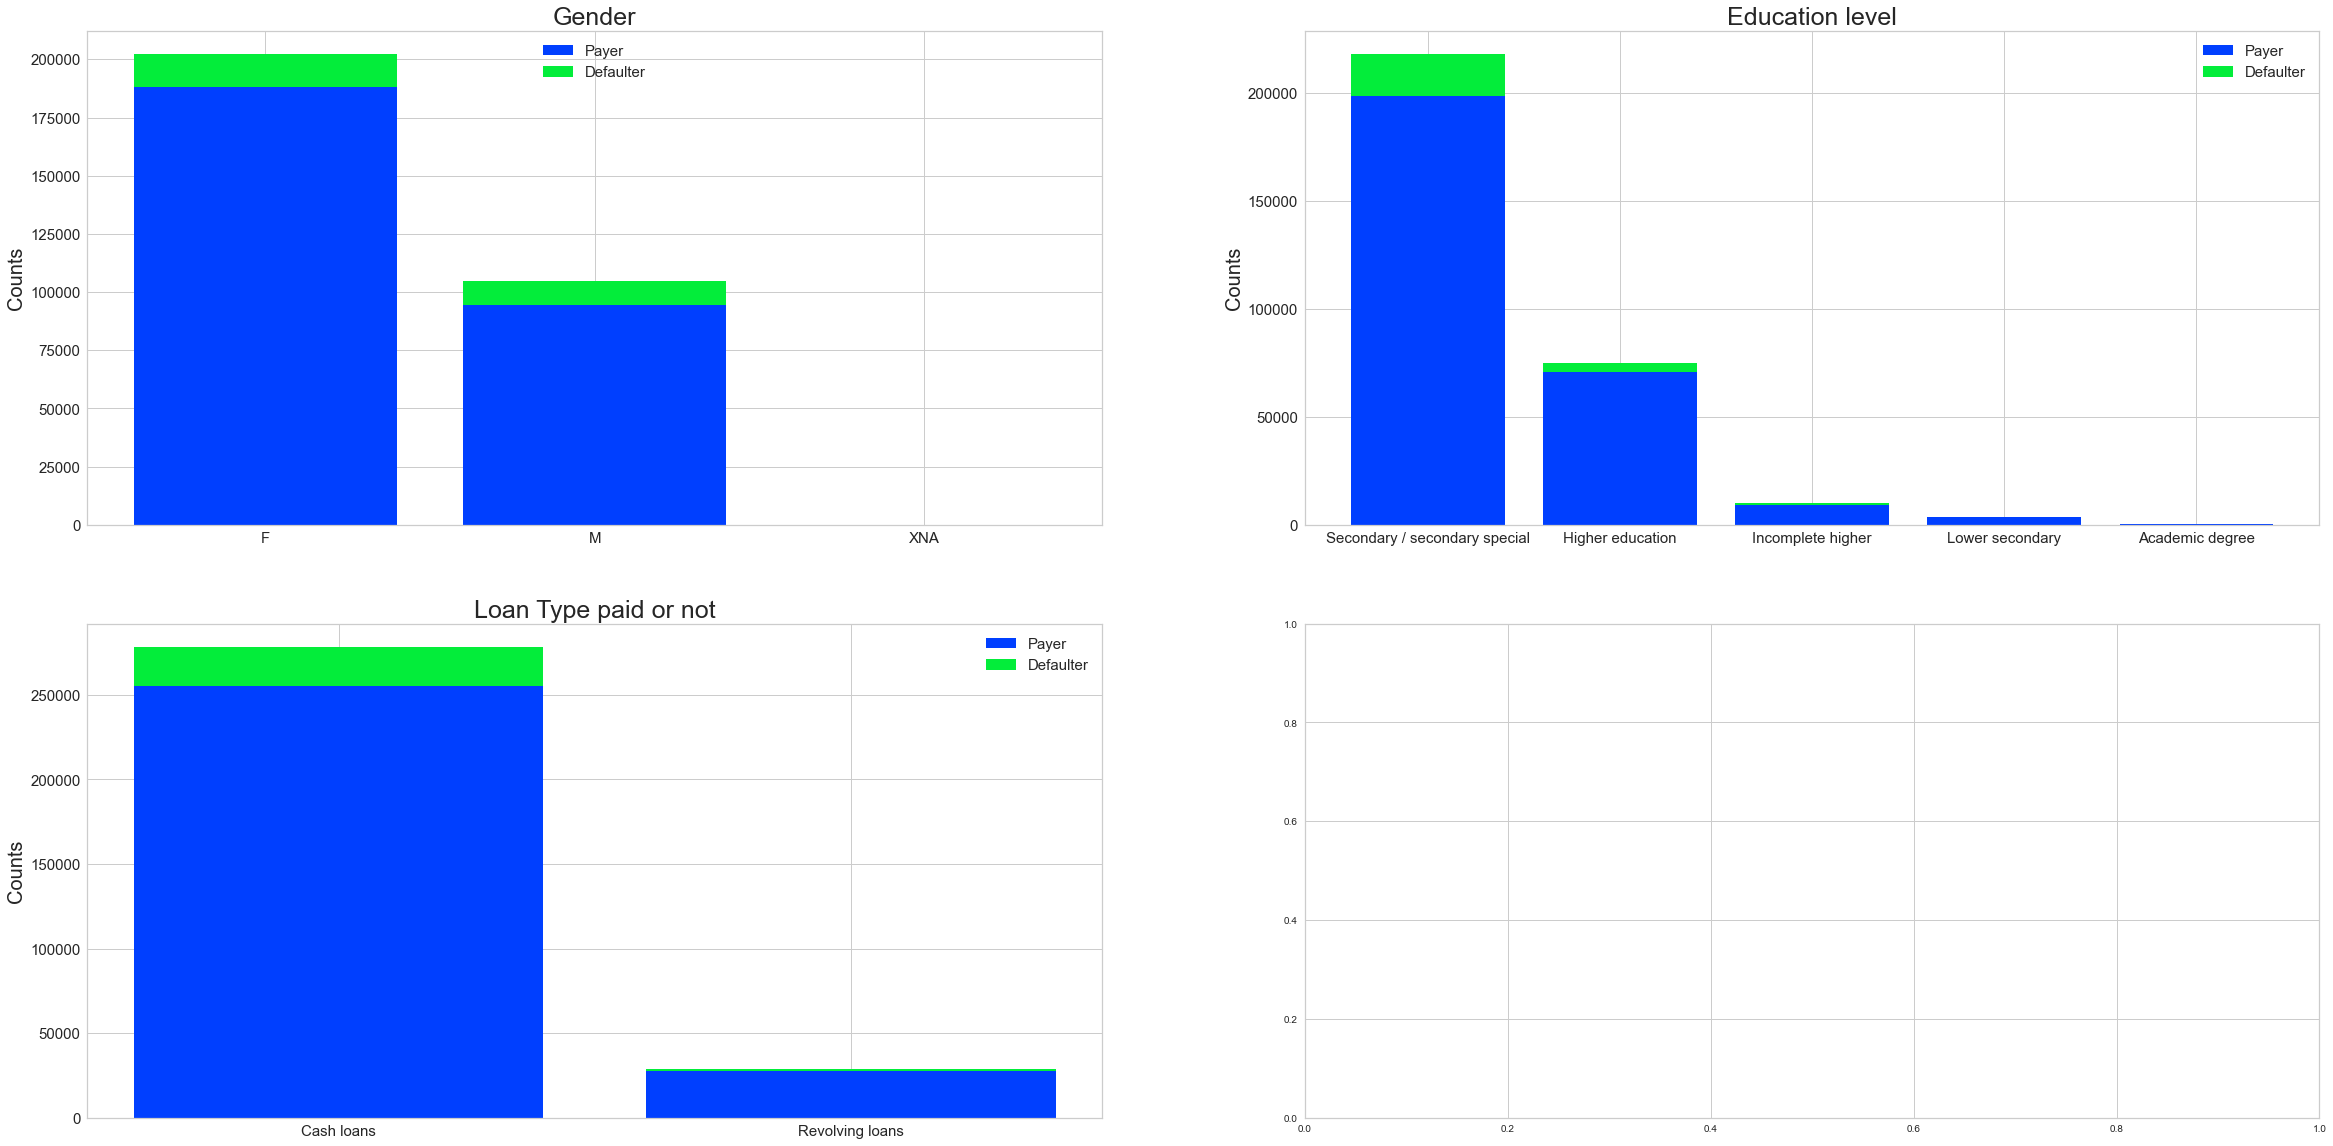

In [42]:
# Setting figure size
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2 , 2, figsize=(40,20))

# make the data read to feed into the visulizer
# It creates a variable which replaces 0 and 1 with Payer and Defaulter respectively, 
# which counts value of PAYER in regards to male and female
# Same goes with Defaulter in terms of CODE_GENDER variable. 
# Implementing same index for two variables
Gender_payer = df.replace({'TARGET': {1: 'Defaulter', 0: 'Payer'}})[df['TARGET']==0]['CODE_GENDER'].value_counts()
Gender_defaulter = df.replace({'TARGET': {1: 'Defaulter', 0: 'Payer'}})[df['TARGET']==1]['CODE_GENDER'].value_counts()
Gender_defaulter = Gender_defaulter.reindex(index = Gender_payer.index)

# make the bar plot
# It will stack survived values to the bottom and not survived values to the top.
p1 = axis1.bar(Gender_payer.index, Gender_payer.values)
p2 = axis1.bar(Gender_defaulter.index, Gender_defaulter.values, bottom=Gender_payer.values)
axis1.set_title('Gender', fontsize=25)
axis1.set_ylabel('Counts', fontsize=20)
axis1.tick_params(axis='both', labelsize=15)
axis1.legend((p1[0], p2[0]), ('Payer', 'Defaulter'), fontsize = 15)


# make the data read to feed into the visualizer
Edu_payer = df.replace({'TARGET': {1: 'Defaulter', 0: 'Payer'}})[df['TARGET']==0]['NAME_EDUCATION_TYPE'].value_counts()
Edu_Defaulter = df.replace({'TARGET': {1: 'Defaulter', 0: 'Payer'}})[df['TARGET']==1]['NAME_EDUCATION_TYPE'].value_counts()
Edu_Defaulter = Edu_Defaulter.reindex(index = Edu_payer.index)

# make the bar plot
p3 = axis2.bar(Edu_payer.index, Edu_payer.values)
p4 = axis2.bar(Edu_Defaulter.index, Edu_Defaulter.values, bottom=Edu_payer.values)
axis2.set_title('Education level', fontsize=25)
axis2.set_ylabel('Counts', fontsize=20)
axis2.tick_params(axis='both', labelsize=15)
axis2.legend((p3[0], p4[0]), ('Payer', 'Defaulter'), fontsize = 15)

# make the data read to feed into the visualizer
loan_type_payer = df.replace({'TARGET': {1: 'Defaulter', 0: 'Payer'}})[df['TARGET']==0]['NAME_CONTRACT_TYPE'].value_counts()
loan_type_defaulter = df.replace({'TARGET': {1: 'Defaulter', 0: 'Payer'}})[df['TARGET']==1]['NAME_CONTRACT_TYPE'].value_counts()
loan_type_defaulter = loan_type_defaulter.reindex(index = loan_type_payer.index)

# make the bar plot
p5 = axis3.bar(loan_type_payer.index, loan_type_payer.values)
p6 = axis3.bar(loan_type_defaulter.index, loan_type_defaulter.values, bottom=loan_type_payer.values)
axis3.set_title('Loan Type paid or not', fontsize=25)
axis3.set_ylabel('Counts', fontsize=20)
axis3.tick_params(axis='both', labelsize=15)
axis3.legend((p5[0], p6[0]), ('Payer', 'Defaulter'), fontsize = 15)
plt.show()

### From the graph above we can conclude that Female paid on time loan more than male; It is less likely to pay if you have low education; and finally Cash loans are paid more than revovling loans.

# Fill in missing values and eliminate features

In [43]:
# List of columns with missing values
print(df.columns[100*df.isnull().sum()/len(df) > 0].tolist())

['NAME_TYPE_SUITE', 'OCCUPATION_TYPE']


In [44]:
# Creating function which will take data parameter 
# and replace the missing value with median value in place 
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

# We are passing AMT_ANNUITY data into function that we just created.
fill_na_median(df['AMT_ANNUITY'])

# check the result
print(df['AMT_ANNUITY'].describe())

count    307221.000000
mean      27120.225984
std       14492.090836
min        1615.000000
25%       16551.000000
50%       24916.000000
75%       34596.000000
max      258025.000000
Name: AMT_ANNUITY, dtype: float64


In [45]:
# Creating function which will take data parameter 
# and replace the missing value with median value in place 
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

# We are passing AMT_GOODS_PRICE data into function that we just created.
fill_na_median(df['AMT_GOODS_PRICE'])

# check the result
print(df['AMT_GOODS_PRICE'].describe())

count    3.072210e+05
mean     5.383973e+05
std      3.694484e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


In [46]:
# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('Unaccompanied', inplace=inplace)

# Feeding NAME_TYPE_SUITE data into function that will replace missing values with most frequent value
fill_na_most(df['NAME_TYPE_SUITE'])

# check the result
print(df['NAME_TYPE_SUITE'].describe())

count            307221
unique                7
top       Unaccompanied
freq             249529
Name: NAME_TYPE_SUITE, dtype: object


In [47]:
# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('Laborers', inplace=inplace)

# Feeding OCCUPATION_TYPE data into function that will replace missing values with most frequent value
fill_na_most(df['OCCUPATION_TYPE'])

# check the result
print(df['OCCUPATION_TYPE'].describe())

count       307221
unique          18
top       Laborers
freq        151466
Name: OCCUPATION_TYPE, dtype: object


In [48]:
# Checking whether or not it got added to most frequent value
df.OCCUPATION_TYPE.value_counts()

Laborers                 151466
Sales staff               32063
Core staff                27530
Managers                  21347
Drivers                   18589
High skill tech staff     11370
Accountants                9801
Medicine staff             8527
Security staff             6712
Cooking staff              5939
Cleaning staff             4648
Private service staff      2648
Low-skill Laborers         2092
Waiters/barmen staff       1346
Secretaries                1304
Realty agents               751
HR staff                    563
IT staff                    525
Name: OCCUPATION_TYPE, dtype: int64

In [49]:
# Checking for any other missing values
df.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION

In [50]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,307221.000000,307221.000000,3.072210e+05,3.072210e+05,307221.000000,3.072210e+05,307221.000000,307221.000000,307221.000000,307221.000000,...,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000
mean,0.080737,0.416977,1.688326e+05,5.993163e+05,27120.225984,5.383973e+05,0.020870,43.941883,67760.549399,4986.328060,...,0.056712,2.152626,2.052454,2.031498,0.015149,0.050758,0.040642,0.078155,0.230401,0.179503
std,0.272431,0.722047,2.372199e+05,4.025196e+05,14492.090836,3.694484e+05,0.013832,11.955761,139473.407413,3523.139489,...,0.231291,0.910623,0.509086,0.502789,0.122144,0.219504,0.197459,0.268417,0.421090,0.383773
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.000000,4.050000e+04,0.000290,20.517808,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,0.010006,34.013699,933.000000,2010.000000,...,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.485000e+05,5.146020e+05,24916.000000,4.500000e+05,0.018850,43.158904,2219.000000,4504.000000,...,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,53.928767,5711.000000,7480.000000,...,0.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.000000,4.050000e+06,0.072508,69.120548,365243.000000,24672.000000,...,1.000000,20.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
# log-transformation
# transform skewed data to approximately conform to normality
# This function return the natural logarithm of one plus the input array, element-wise
def log_transformation(data):
    return data.apply(np.log1p)

# Creating new column 'Goods_log1p' which will be transformation of 'AMT_GOODS-PRICE' data 
df['Goods_log1p'] = log_transformation(df['AMT_GOODS_PRICE'])

# check the data
print(df.describe())

              TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307221.000000  307221.000000      3.072210e+05  3.072210e+05   
mean        0.080737       0.416977      1.688326e+05  5.993163e+05   
std         0.272431       0.722047      2.372199e+05  4.025196e+05   
min         0.000000       0.000000      2.565000e+04  4.500000e+04   
25%         0.000000       0.000000      1.125000e+05  2.700000e+05   
50%         0.000000       0.000000      1.485000e+05  5.146020e+05   
75%         0.000000       1.000000      2.025000e+05  8.086500e+05   
max         1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307221.000000     3.072210e+05               307221.000000   
mean    27120.225984     5.383973e+05                    0.020870   
std     14492.090836     3.694484e+05                    0.013832   
min      1615.000000     4.050000e+04                    0.000290   
25%     16551.0

# Adjust skewed data (Goods Price)
# check the distribution using histogram

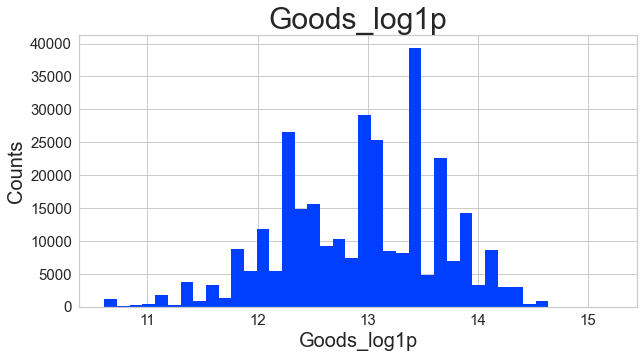

In [52]:
# set up the figure size
plt.rcParams['figure.figsize'] = (10, 5)
# Using pyplot creating histogram with 40 bins for Goods_log1p column
# Labeling title, x, y axes 
plt.hist(df['Goods_log1p'], bins=40)
plt.title('Goods_log1p', fontsize=30)
plt.xlabel('Goods_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
# Displaying histogram
plt.show()

# Convert categorical data to numbers

In [53]:
# Creating list of categorical data
cat_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
# assigning columns of categorical data to data_cat variable 
data_cat = df[cat_features]
# One Hot Encoding, this will remove relationship by creating dummy columns for each unique value
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(8))

   CODE_GENDER_F  CODE_GENDER_M  CODE_GENDER_XNA  FLAG_OWN_CAR_N  \
0              0              1                0               1   
1              1              0                0               1   
2              0              1                0               0   
3              1              0                0               1   
4              0              1                0               1   
5              0              1                0               1   
6              1              0                0               0   
7              0              1                0               0   

   FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_N  FLAG_OWN_REALTY_Y  
0               0                  0                  1  
1               0                  1                  0  
2               1                  0                  1  
3               0                  0                  1  
4               0                  0                  1  
5               0                  0   

# Part 3

In [54]:
# Combining features model columns and one Hot Encoding columns together 
features_model = ['REGION_RATING_CLIENT', 'CNT_CHILDREN', 'REGION_RATING_CLIENT_W_CITY']
data_model_X = pd.concat([df[features_model],data_cat_dummies], axis=1)
data_model_X

,REGION_RATING_CLIENT,CNT_CHILDREN,REGION_RATING_CLIENT_W_CITY,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y
0,2,0,2,0,1,0,1,0,0,1
1,1,0,1,1,0,0,1,0,1,0
2,2,0,2,0,1,0,0,1,0,1
3,2,0,2,1,0,0,1,0,0,1
4,2,0,2,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
307506,1,0,1,0,1,0,1,0,1,0
307507,2,0,2,1,0,0,1,0,0,1
307508,3,0,3,1,0,0,1,0,0,1
307509,2,0,2,1,0,0,1,0,0,1


In [55]:
# For model y we will be using whether applicant will be defaulter or not.
# Values in 0 and 1
data_model_y = df['TARGET']
data_model_y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307221, dtype: int64

In [56]:
# split the data
# train_test_split() perform the split and returns four sequences in train, test(first sequence), train, test
# (second sequence) order. To make our test reproducible we use random_state
X_train, X_test, y_train, y_test = train_test_split(data_model_X, data_model_y, test_size=0.25, random_state=10)

In [57]:
#number of samples in each set
# .shape gives us rows and columns in the form of tuple which we can seperate it by indexing
print('Number of samples in training set: ', X_train.shape[0])
print('Number of samples in testing set: ', X_test.shape[0])

Number of samples in training set:  230415
Number of samples in testing set:  76806


In [58]:
# Loan Defaulter or not
# It returns unique value count
print('Number of loan defaulter and payer in the training set: ')
print(y_train.value_counts())

Number of loan defaulter and payer in the training set: 
0    211837
1     18578
Name: TARGET, dtype: int64


In [59]:
# It returns unique value count
print('Number of loan defaulter and payer in the validation set: ')
print(y_test.value_counts())

Number of loan defaulter and payer in the validation set: 
0    70580
1     6226
Name: TARGET, dtype: int64


# Evaluation Metrics

## Oversampling

In [60]:
# concatenate our training data back together
data_model_X = pd.concat([X_train, y_train], axis=1)

In [61]:
# seperate minority and majority classes
payer = data_model_X[data_model_X.TARGET==0]
loan_defaulter = data_model_X[data_model_X.TARGET==1]

In [62]:
# Upsample minority
loan_defaulter_upsampled = resample(loan_defaulter,
                                   replace=True, #sample with replacement
                                   n_samples=len(payer), # match number in majority class
                                   random_state=27) #reproducible results

In [63]:
# combine majority and upsampled minority
upsampled = pd.concat([payer, loan_defaulter_upsampled])

In [64]:
# checking new class counts
upsampled.TARGET.value_counts()

0    211837
1    211837
Name: TARGET, dtype: int64

In [65]:
# Trying logistic regression again with the balanced dataset
y_train = upsampled.TARGET
X_train = upsampled.drop('TARGET', axis=1)

In [66]:
mdl1 = LogisticRegression(solver='liblinear')
upsampled = mdl1.fit(X_train, y_train)
upsampled_pred = upsampled.predict(X_test)

In [67]:
# Displaying Model Accuracy, Precision, Recall and F-Score
print('Model Accuracy: {:.2f}%'.format(np.mean(upsampled_pred == y_test) * 100))
print('Precision: {:.2f}%'.format(precision_score(y_test, upsampled_pred, average="macro")*100))
print('Recall: {:.2f}%'.format(recall_score(y_test, upsampled_pred, average="macro")*100))
print('F-score: {:.2f}%'.format(f1_score(y_test, upsampled_pred, average="macro")*100))

Model Accuracy: 66.20%
Precision: 52.18%
Recall: 56.46%
F-score: 48.22%


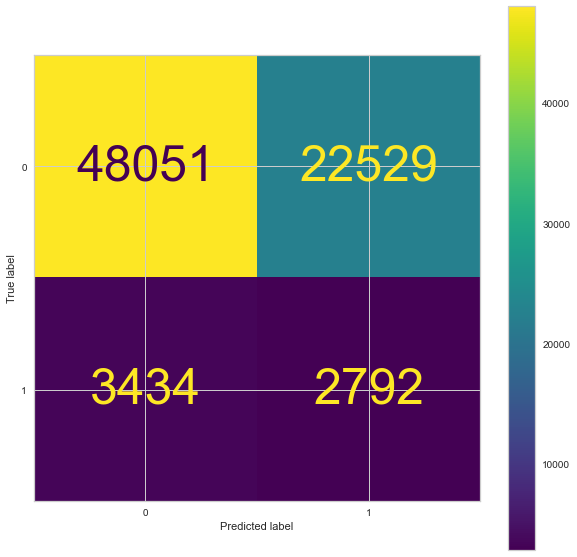

In [68]:
# Computing Confusion Matrix to evaluate the accuracy of a classification
cm2 = confusion_matrix(y_test, upsampled_pred)
cm2
# Plotting confusion matrix
fig, ax = plt.subplots(figsize=(10,10))
fig = ConfusionMatrixDisplay(confusion_matrix=cm2)
fig.plot(ax=ax)
plt.show()

### Our model is 66.20% accurate. True Positive(TP) is 48051, True Negative(TN) is 2792, False Positive(FP) is 22529 and False negative(FN) is 3434. When model correctly predicts the outcome of positive class is known as TP. Predicts negative class is TN. FP also called a type 1 error, when model incorrectly predicts the outcome of positive class and finally FN known as type 2 error, where model incorrectly predicts negative class when it is actually positive. 


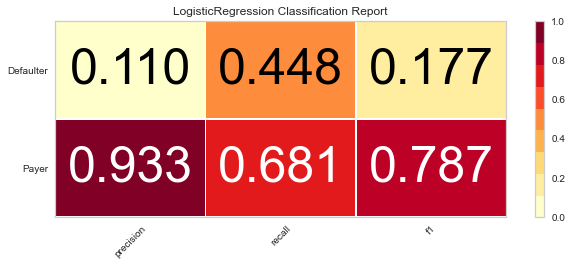

In [69]:
# Instantiate the visualizer
visualizer = ClassificationReport(mdl1, classes=classes)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)  
# Evaluate the model on the test data
visualizer.score(X_test, y_test) 
# poof is called to display the image
g = visualizer.poof()

### It is predicting payers more accurately than defaulters. When we average it out, it gives us in 50's for precision and recall whereas f1 is even lower in mid 40's. 

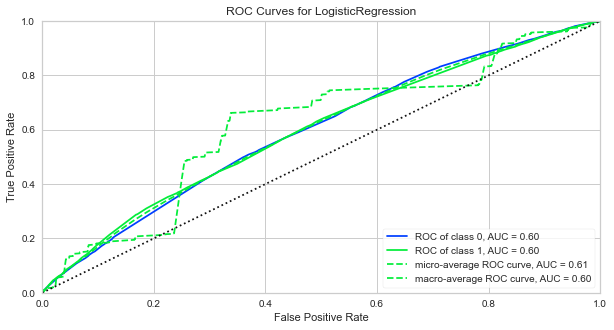

In [70]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(mdl1)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
# poof is called to display the image
g = visualizer.poof()

### It shows our model is good, we want our model to be over the line. Anything over the black dotted line is consider as 1 and under as 0.

## Downsampling

In [71]:
# Using same separated classes payer and loan_defaulter from above
# downsample majority
payer_downsampled = resample(payer, 
                            replace = False, # sample without replacement
                            n_samples = len(loan_defaulter), # match minority n
                            random_state = 27) # reproducible results

In [72]:
# combine minority and downsampled majority
downsampled = pd.concat([payer_downsampled, loan_defaulter])

In [73]:
# checking sample count
downsampled.TARGET.value_counts()

0    18578
1    18578
Name: TARGET, dtype: int64

In [74]:
# trying logistic regression again with the undersampled dataset
y_train = downsampled.TARGET
X_train = downsampled.drop('TARGET', axis=1)

mdl2 = LogisticRegression(solver='liblinear')
undersampled = mdl2.fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

In [75]:
# Displaying Model Accuracy, Precision, Recall and F-Score
print('Model Accuracy: {:.2f}%'.format(np.mean(undersampled_pred == y_test) * 100))
print('Precision: {:.2f}%'.format(precision_score(y_test, undersampled_pred, average="macro")*100))
print('Recall: {:.2f}%'.format(recall_score(y_test, undersampled_pred, average="macro")*100))
print('F-score: {:.2f}%'.format(f1_score(y_test, undersampled_pred, average="macro")*100))

Model Accuracy: 58.91%
Precision: 52.02%
Recall: 56.58%
F-score: 45.07%


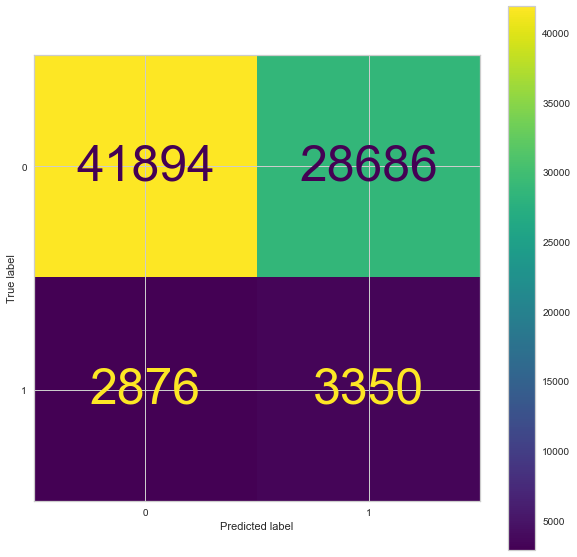

In [76]:
# Computing Confusion Matrix to evaluate the accuracy of a classification
cm3 = confusion_matrix(y_test, undersampled_pred)
cm3
# Plotting confusion matrix
fig, ax = plt.subplots(figsize=(10,10))
fig = ConfusionMatrixDisplay(confusion_matrix=cm3)
fig.plot(ax=ax)
plt.show()

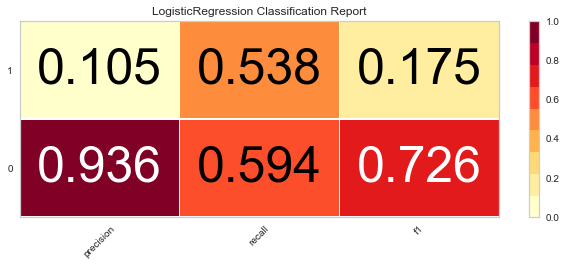

In [77]:
# Instantiate the visualizer
visualizer = ClassificationReport(mdl2)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)  
# Evaluate the model on the test data
visualizer.score(X_test, y_test) 
# poof is called to display the image
g = visualizer.poof()

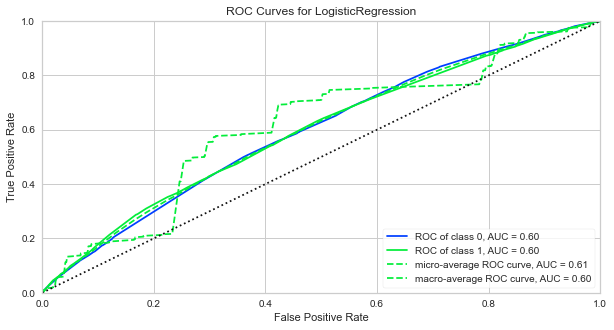

In [78]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(mdl2)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
# poof is called to display the image
g = visualizer.poof()

### My dataset was imbalanced and my previous model was showing high accuracy but it was misleading since it was always predicting payer. I tried Random Forest but result was unsatisfied. The best among the results was by performing oversampling which gave Model Accuracy: 66.20%, Precision: 52.18%, Recall: 56.46%, F-score: 48.22%.  

### When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision: If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company, If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company. Based on model we can predict accurately 66.20 times out of 100 which is not bad. 2 out 3 times prediction will be correct. 